## Painkiller Excessive Usage Among Endometriosis Patients

### **Why This Analysis?**
Chronic pain is a hallmark of **endometriosis**, and many patients rely on **painkillers** for relief. However, overuse of painkillers can lead to **serious side effects** and long-term health risks.

### **Key Findings**
- **50% of patients** admitted to **taking painkillers more often than prescribed**, or **exceed the recommended dose of over-the-counter (OTC) painkillers**.
- This suggests that for **half of the patients**, standard pain relief is **not sufficient**.

### **Implications**
- **Over-reliance on painkillers** may indicate **ineffective pain management strategies**.
- There is a **need for alternative pain relief options**, such as:
  - **Hormonal therapy**
  - **Physical therapy**
  - **Lifestyle modifications**
  - **Surgical interventions**

In [1]:
import pandas as pd

# Load the list of endometriosis patients (keeping only USER_ID)
endo_users = pd.read_csv("endo_questionnaires.csv", usecols=["USER_ID"])

# Load painkiller data
painkiller_data = pd.read_csv("painkiller_nore_often_than_prescribed.csv")

# Remove empty answers
painkiller_data = painkiller_data.dropna(subset=["ANSWER"])

# Remove duplicate responses (keeping one unique response per USER_ID)
painkiller_data = painkiller_data.drop_duplicates(subset=["USER_ID", "ANSWER"])

# Merge only endometriosis patients
merged_df = painkiller_data.merge(endo_users, on="USER_ID", how="inner")

# Count the responses
response_counts = merged_df["ANSWER"].value_counts()





In [2]:
# Count the responses and calculate percentages
response_percentages = merged_df["ANSWER"].value_counts(normalize=True) * 100



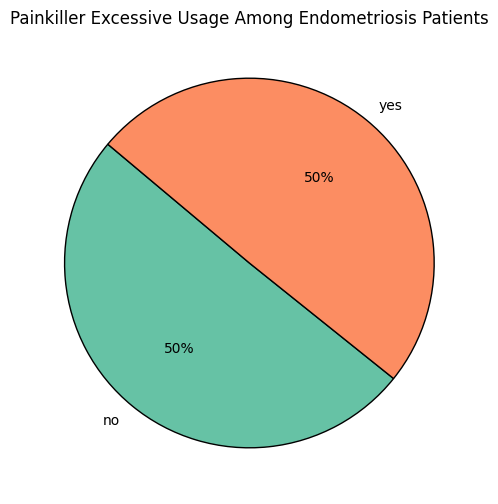

In [3]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(response_percentages, labels=response_percentages.index, autopct='%1.0f%%', 
        colors=["#66c2a5", "#fc8d62"], startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Painkiller Excessive Usage Among Endometriosis Patients")
plt.show()

## Endometriosis & Other Conditions Distribution

### **Why This Analysis?**
This analysis helps us understand **how many patients have endometriosis alone vs. those who have additional conditions**. 

### **Key Findings**
- **65% of patients** have **at least one additional condition** alongside endometriosis.
- Only **35%** have **endometriosis as their sole diagnosis**.

### **Implications**
- **Most endometriosis patients have additional conditions**, which supports the hypothesis that **endometriosis often co-exists with other disorders**.
- **Multidisciplinary treatment approaches** may be needed to address both endometriosis and other co-existing conditions.

In [4]:
import pandas as pd

# Load the dataset
endo_df = pd.read_csv("endo_questionnaires.csv")  # Update path if needed

# Filter rows where the QUESTION is about diagnosis
endo_cases = endo_df.loc[endo_df["QUESTION"] == "Has a doctor ever told you that you have any of the below conditions?"].copy()

# Check if "endometriosis" is in the ANSWER column and if there are other conditions (comma-separated)
endo_cases["Has_Other_Conditions"] = endo_cases["ANSWER"].apply(lambda x: isinstance(x, str) and "endometriosis" in x.lower() and "," in x)

# Count occurrences
endo_only_count = (endo_cases["Has_Other_Conditions"] == False).sum()
endo_with_other_count = (endo_cases["Has_Other_Conditions"] == True).sum()

# Create a new DataFrame with the counts
results_df = pd.DataFrame({
    "Condition": ["Endometriosis Only", "Endometriosis + Other Condition"],
    "Count": [endo_only_count, endo_with_other_count]
})



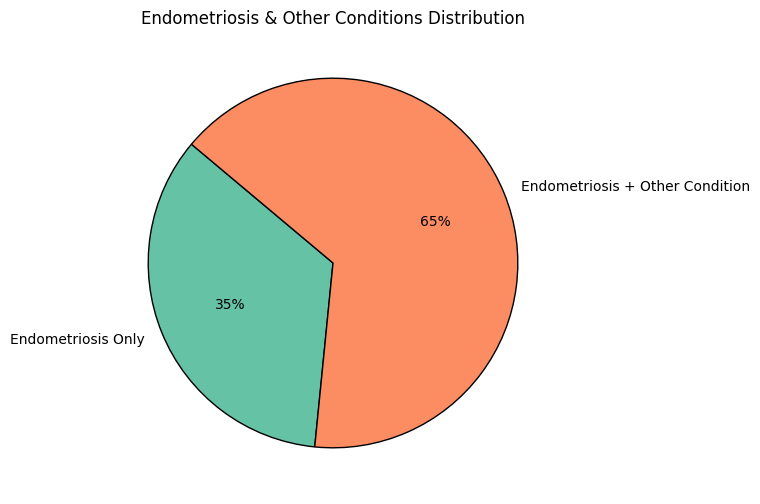

In [5]:
import matplotlib.pyplot as plt

# Data from the last output
labels = ["Endometriosis Only", "Endometriosis + Other Condition"]
counts = [163, 309]

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.0f%%', colors=["#66c2a5", "#fc8d62"], startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Endometriosis & Other Conditions Distribution")
plt.show()



## Prevalence of Other Conditions in Endometriosis Patients

### **Why This Analysis?**
Endometriosis is often associated with other conditions, making it essential to analyze **co-existing diagnoses** in patients. This helps in understanding potential **comorbidities** and improving treatment approaches.

### **Key Findings**
- **Infertility or subfertility** is the most common co-existing condition, affecting **23% of patients**.
- **Adenomyosis (14.4%) and IBS (14.1%)** are also frequently reported.
- Other conditions such as **PCOS, cystitis, PMS, and fibromyalgia** are also present in a notable proportion.

### **Implications**
Understanding **which conditions frequently occur alongside endometriosis** can help healthcare professionals tailor **personalized treatment plans** and offer **better symptom management**.

In [6]:
import pandas as pd

# Load the dataset
endo_df = pd.read_csv("endo_questionnaires.csv")  # Update with your file path if needed

# Filter for the relevant QUESTION
endo_cases = endo_df.loc[endo_df["QUESTION"] == "Has a doctor ever told you that you have any of the below conditions?"].copy()

# Keep only rows where "endometriosis" is mentioned in the ANSWER
endo_cases = endo_cases[endo_cases["ANSWER"].str.contains("endometriosis", case=False, na=False)]

# Expand comma-separated conditions into a structured table format
expanded_conditions = endo_cases["ANSWER"].str.split(",", expand=True)

# Rename columns dynamically as Condition_1, Condition_2, etc.
expanded_conditions.columns = [f"Condition_{i+1}" for i in range(expanded_conditions.shape[1])]

# Merge back with USER_ID for reference
result_df = pd.concat([endo_cases["USER_ID"].reset_index(drop=True), expanded_conditions], axis=1)


In [7]:
import pandas as pd
from collections import Counter

# Load the dataset
endo_df = pd.read_csv("endo_questionnaires.csv")  # Update the path if needed

# Filter for the relevant QUESTION
endo_cases = endo_df.loc[endo_df["QUESTION"] == "Has a doctor ever told you that you have any of the below conditions?"].copy()

# Keep only rows where "endometriosis" is mentioned in the ANSWER
endo_cases = endo_cases[endo_cases["ANSWER"].str.contains("endometriosis", case=False, na=False)]

# Extract all conditions (split comma-separated answers)
all_conditions = []
for answer in endo_cases["ANSWER"]:
    conditions = [c.strip() for c in answer.split(",")]  # Split by comma and remove spaces
    all_conditions.extend(conditions)

# Count occurrences of each condition
condition_counts = Counter(all_conditions)

# Convert to DataFrame for visualization
condition_df = pd.DataFrame(condition_counts.items(), columns=["Condition", "Count"]).sort_values(by="Count", ascending=False)



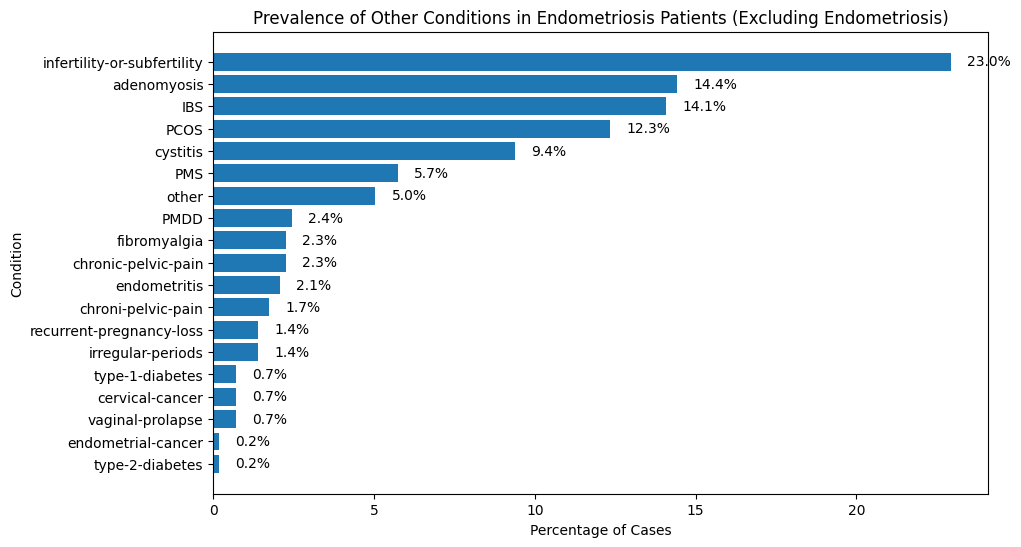

In [8]:
import matplotlib.pyplot as plt

# Remove "endometriosis" from the list
condition_df_filtered = condition_df[condition_df["Condition"] != "endometriosis"].copy()

# Convert counts to percentages
total_cases = condition_df_filtered["Count"].sum()
condition_df_filtered["Percentage"] = (condition_df_filtered["Count"] / total_cases) * 100

# Plot a horizontal bar chart with percentages
plt.figure(figsize=(10, 6))
plt.barh(condition_df_filtered["Condition"], condition_df_filtered["Percentage"], color="#1f77b4")
plt.xlabel("Percentage of Cases")
plt.ylabel("Condition")
plt.title("Prevalence of Other Conditions in Endometriosis Patients (Excluding Endometriosis)")

# Add percentage labels to bars
for index, value in enumerate(condition_df_filtered["Percentage"]):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

## Symptoms Reported by Endometriosis Patients

### **Why This Analysis?**
Endometriosis presents a **wide range of symptoms**, impacting patients differently. By analyzing **self-reported symptoms**, we can identify **which symptoms are most common** among those diagnosed with endometriosis.

### **Key Findings**
- **Pain in the abdomen outside of the period (17%)** and **painful sex (14%)** are among the most commonly reported symptoms.
- Other frequently reported symptoms include **external itchiness (13%)**, **dryness (10%)**, and **internal itchiness (8%)**.
- Symptoms such as **bleeding after sex, vulva pain, and vaginal swelling** are less common but still affect a portion of patients.

### **Implications**
- These insights can **help guide symptom management strategies** and inform treatment approaches.
- **Pain management** and **hormonal treatments** might be necessary for many patients to address these symptoms.

In [9]:
import pandas as pd
import json

# Load the datasets
endo_df = pd.read_csv("endo_questionnaires.csv")  # Endometriosis diagnosis data
symptoms_df = pd.read_csv("symptoms.csv")

# Filter only users diagnosed with endometriosis from endo_questionnaires.csv
endo_users = endo_df.loc[endo_df["QUESTION"] == "Has a doctor ever told you that you have any of the below conditions?"].copy()

# Keep only users who mentioned "endometriosis" in their ANSWER
endo_users = endo_users[endo_users["ANSWER"].str.contains("endometriosis", case=False, na=False)]

# Extract only the USER_IDs of endometriosis patients
endo_user_ids = set(endo_users["USER_ID"])

# Filter symptoms.csv to keep only users diagnosed with endometriosis
symptoms_df = symptoms_df[symptoms_df["USER_ID"].isin(endo_user_ids)]

# Identify rows with JSON-formatted answers
json_rows = symptoms_df["ANSWER"].apply(lambda x: x.startswith("{") if isinstance(x, str) else False)

# Process JSON-formatted answers and count only "yes" responses
expanded_symptoms = []
for _, row in symptoms_df[json_rows].iterrows():
    user_id = row["USER_ID"]
    symptoms_json = json.loads(row["ANSWER"])  # Convert JSON string to dictionary
    for symptom, value in symptoms_json.items():
        if value.lower() == "yes":  # Count only symptoms marked as "yes"
            expanded_symptoms.append({"USER_ID": user_id, "Symptom": symptom})

# Convert to DataFrame
expanded_symptoms_df = pd.DataFrame(expanded_symptoms)

# Summarize the symptoms across all users (count occurrences of each "yes" symptom)
symptom_counts = expanded_symptoms_df["Symptom"].value_counts().reset_index()
symptom_counts.columns = ["Symptom", "Count"]



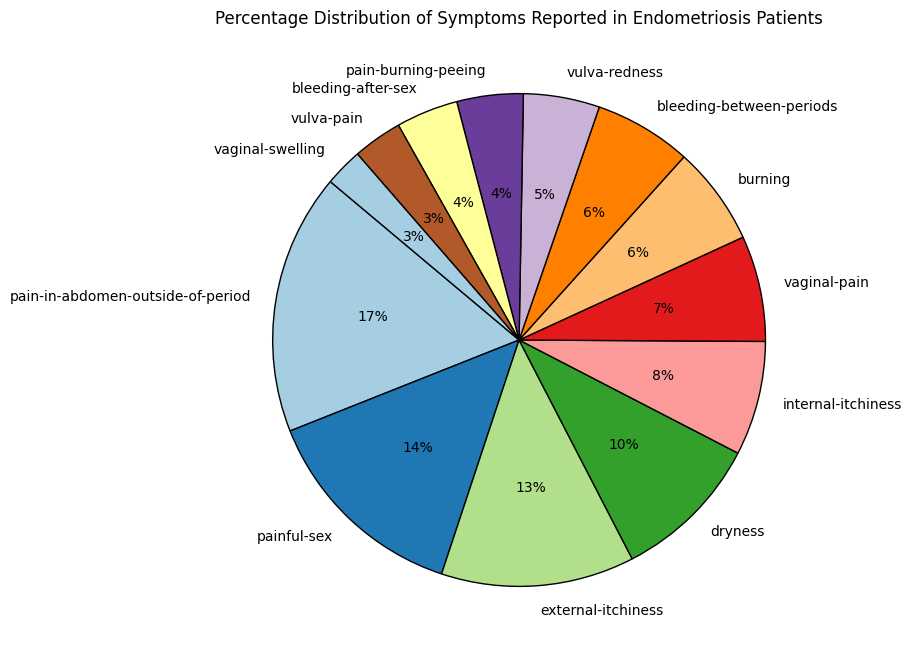

In [10]:
import matplotlib.pyplot as plt

# Convert counts to percentages
symptom_counts["Percentage"] = (symptom_counts["Count"] / symptom_counts["Count"].sum()) * 100

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(symptom_counts["Percentage"], labels=symptom_counts["Symptom"], autopct='%1.0f%%', 
        colors=plt.cm.Paired.colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Percentage Distribution of Symptoms Reported in Endometriosis Patients")
plt.show()